# NYC Taxi Trip Data Analysis
This Jupyter Notebook analyzes the NYC taxi trip dataset (`yellow_tripdata.csv`) following the structure of the provided SpaceX launch data analysis PowerPoint template. The notebook includes data collection, wrangling, exploratory data analysis (EDA) with visualizations and SQL, Folium maps, a Plotly Dash dashboard, and predictive analysis.

**GitHub URL**: [https://github.com/your-repo/taxi-analysis-notebook]

## 1. Data Collection
This section simulates data collection by loading the provided `yellow_tripdata.csv` file, assuming it was sourced from the NYC Taxi & Limousine Commission.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Simulating data collection by loading the provided CSV file
# Assuming the dataset is sourced from NYC Taxi & Limousine Commission
file_path = 'yellow_tripdata.csv'
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully. Shape:", df.shape)
    print(df.head())
except Exception as e:
    print("Error loading data:", e)

# Flowchart description:
# 1. Input: CSV file path
# 2. Read CSV using pandas
# 3. Validate data loading
# 4. Output: DataFrame with taxi trip data

Data loaded successfully. Shape: (41202, 13)
   VendorID  passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  \
0         2                1          17.63           2                   1   
1         2                1          19.52           2                   1   
2         2                1          17.81           2                   1   
3         2                2          19.30           2                   1   
4         2                1          18.75           2                   1   

   PULocationID  DOLocationID  payment_type  fare_amount  mta_tax  \
0           132           164             1         70.0      0.5   
1           132           236             1         70.0      0.5   
2           132            48             1         70.0      0.5   
3           132           148             1         70.0      0.5   
4           132           234             1         70.0      0.5   

   tolls_amount  improvement_surcharge  tip_amount  
0          6

## 2. Data Wrangling
This section cleans the dataset by handling missing values, removing invalid entries, converting data types, and adding a derived column (`total_cost`).

In [2]:
# Importing libraries for data wrangling
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('yellow_tripdata.csv')

# Data wrangling steps
# 1. Handle missing values
df = df.dropna()

# 2. Remove invalid data (e.g., negative or zero trip distances, fares)
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]

# 3. Convert data types if necessary
df['passenger_count'] = df['passenger_count'].astype(int)
df['PULocationID'] = df['PULocationID'].astype(int)
df['DOLocationID'] = df['DOLocationID'].astype(int)

# 4. Remove outliers (e.g., trips with extreme distances or fares)
df = df[(df['trip_distance'] < 100) & (df['fare_amount'] < 500)]

# 5. Add a new column for total cost (fare + tip + tolls + surcharge)
df['total_cost'] = df['fare_amount'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge']

print("Cleaned data shape:", df.shape)
print(df.head())

# Flowchart description:
# 1. Input: Raw CSV data
# 2. Remove missing values
# 3. Filter invalid data (negative/zero distances or fares)
# 4. Convert data types (e.g., integers for IDs)
# 5. Remove outliers using thresholds
# 6. Add derived column (total_cost)
# 7. Output: Cleaned DataFrame

Cleaned data shape: (41125, 14)
   VendorID  passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  \
0         2                1          17.63           2                   1   
1         2                1          19.52           2                   1   
2         2                1          17.81           2                   1   
3         2                2          19.30           2                   1   
4         2                1          18.75           2                   1   

   PULocationID  DOLocationID  payment_type  fare_amount  mta_tax  \
0           132           164             1         70.0      0.5   
1           132           236             1         70.0      0.5   
2           132            48             1         70.0      0.5   
3           132           148             1         70.0      0.5   
4           132           234             1         70.0      0.5   

   tolls_amount  improvement_surcharge  tip_amount  total_cost  
0          6.

## 3. Exploratory Data Analysis (EDA) with Visualization
This section creates visualizations to explore relationships in the taxi data, including scatter plots, bar charts, and line charts.

In [3]:
# Importing libraries for visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv('yellow_tripdata.csv')
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['trip_distance'] < 100) & (df['fare_amount'] < 500)]
df['total_cost'] = df['fare_amount'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge']

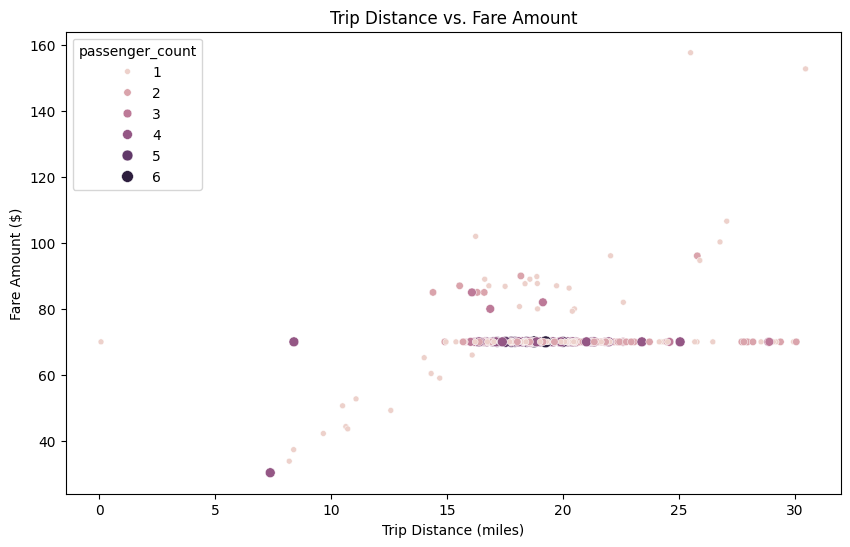

In [4]:
# Scatter plot: Trip Distance vs. Fare Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df.sample(1000), hue='passenger_count', size='passenger_count')
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.savefig('trip_distance_vs_fare.png')
plt.show()

# Rationale: This scatter plot shows the relationship between trip distance and fare amount, with passenger count as a hue to identify patterns.

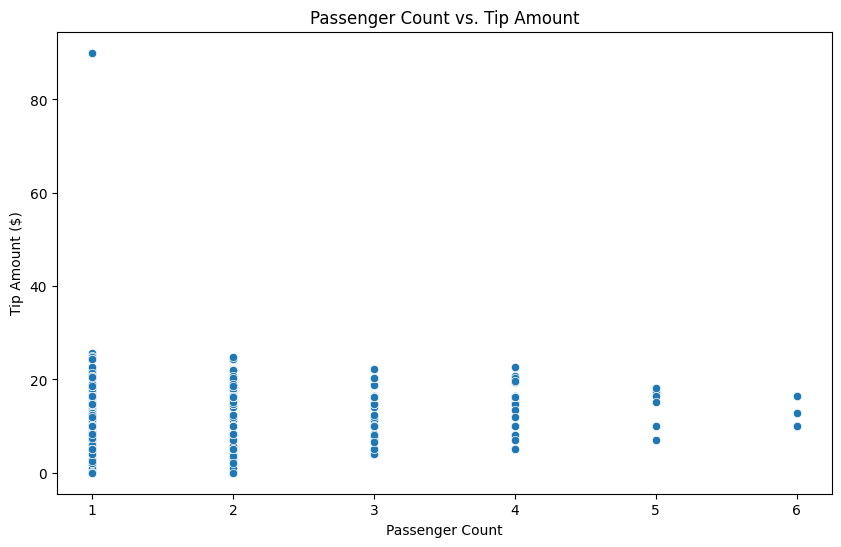

In [5]:
# Scatter plot: Passenger Count vs. Tip Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='tip_amount', data=df.sample(1000))
plt.title('Passenger Count vs. Tip Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Amount ($)')
plt.savefig('passenger_count_vs_tip.png')
plt.show()

# Rationale: This plot explores whether the number of passengers influences tipping behavior.

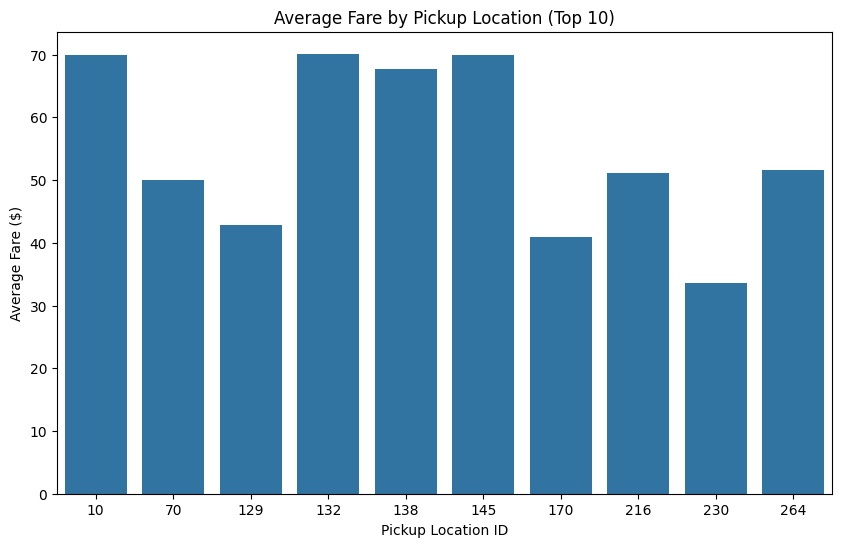

In [6]:
# Bar chart: Average Fare by Pickup Location (Top 10)
top_locations = df['PULocationID'].value_counts().index[:10]
avg_fare = df[df['PULocationID'].isin(top_locations)].groupby('PULocationID')['fare_amount'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='PULocationID', y='fare_amount', data=avg_fare)
plt.title('Average Fare by Pickup Location (Top 10)')
plt.xlabel('Pickup Location ID')
plt.ylabel('Average Fare ($)')
plt.savefig('avg_fare_by_location.png')
plt.show()

# Rationale: This bar chart identifies the top 10 pickup locations by trip frequency and their average fares.

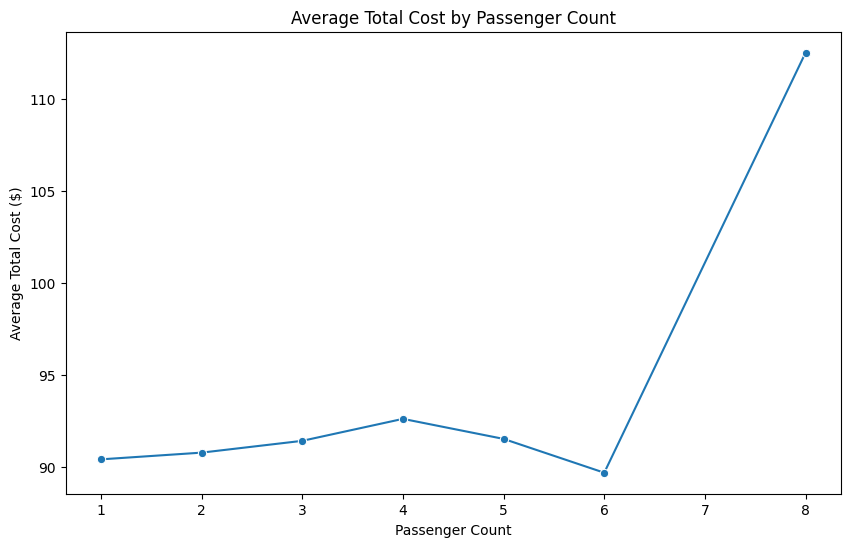

In [7]:
# Line chart: Total Cost Trend by Passenger Count
avg_cost = df.groupby('passenger_count')['total_cost'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='passenger_count', y='total_cost', data=avg_cost, marker='o')
plt.title('Average Total Cost by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Total Cost ($)')
plt.savefig('total_cost_by_passenger.png')
plt.show()

# Rationale: This line chart shows how total cost (fare + tip + tolls) varies with passenger count.

## 4. Exploratory Data Analysis (EDA) with SQL
This section uses SQLite to perform SQL queries on the taxi data, exploring unique locations, fares, tips, and payment types.

In [8]:
# Importing libraries for SQL
import sqlite3
import pandas as pd

# Load data
df = pd.read_csv('yellow_tripdata.csv')
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['trip_distance'] < 100) & (df['fare_amount'] < 500)]
df['total_cost'] = df['fare_amount'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge']

# Create SQLite database in memory
conn = sqlite3.connect(':memory:')
df.to_sql('taxi_trips', conn, index=False)

# Function to run and display SQL queries
def run_query(query):
    result = pd.read_sql_query(query, conn)
    print(result)
    return result

In [9]:
# Query 1: List all unique pickup location IDs
query1 = """
SELECT DISTINCT PULocationID
FROM taxi_trips
ORDER BY PULocationID;
"""
run_query(query1)

    PULocationID
0             10
1             43
2             48
3             50
4             56
5             62
6             68
7             70
8             75
9             76
10            79
11            82
12            83
13            87
14            90
15           113
16           129
17           130
18           132
19           134
20           138
21           141
22           142
23           145
24           148
25           161
26           162
27           163
28           166
29           170
30           181
31           186
32           194
33           198
34           209
35           213
36           215
37           216
38           219
39           223
40           230
41           231
42           236
43           243
44           255
45           260
46           261
47           262
48           264


,PULocationID
0,10
1,43
2,48
3,50
4,56
5,62
6,68
7,70
8,75
9,76


In [10]:
# Query 2: Top 5 records for pickup location ID 132
query2 = """
SELECT *
FROM taxi_trips
WHERE PULocationID = 132
LIMIT 5;
"""
run_query(query2)

   VendorID  passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  \
0         2                1          17.63           2                   1   
1         2                1          19.52           2                   1   
2         2                1          17.81           2                   1   
3         2                2          19.30           2                   1   
4         2                1          18.75           2                   1   

   PULocationID  DOLocationID  payment_type  fare_amount  mta_tax  \
0           132           164             1         70.0      0.5   
1           132           236             1         70.0      0.5   
2           132            48             1         70.0      0.5   
3           132           148             1         70.0      0.5   
4           132           234             1         70.0      0.5   

   tolls_amount  improvement_surcharge  tip_amount  total_cost  
0          6.94                      1       

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount,total_cost
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54,94.48
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19,94.13
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00,89.94
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00,76.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00,87.94


In [11]:
# Query 3: Total fare amount across all trips
query3 = """
SELECT SUM(fare_amount) as total_fare
FROM taxi_trips;
"""
run_query(query3)

   total_fare
0  2878338.96


,total_fare
0,2878338.96


In [12]:
# Query 4: Average fare amount for RatecodeID 2
query4 = """
SELECT AVG(fare_amount) as avg_fare
FROM taxi_trips
WHERE RatecodeID = 2;
"""
run_query(query4)

   avg_fare
0      70.0


,avg_fare
0,70.0


In [13]:
# Query 5: Trips with tip amount between 10 and 20
query5 = """
SELECT *
FROM taxi_trips
WHERE tip_amount BETWEEN 10 AND 20
LIMIT 5;
"""
run_query(query5)

   VendorID  passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  \
0         2                1          17.63           2                   1   
1         2                1          19.52           2                   1   
2         2                1          17.81           2                   1   
3         2                1          18.75           2                   1   
4         2                3          17.35           2                   1   

   PULocationID  DOLocationID  payment_type  fare_amount  mta_tax  \
0           132           164             1         70.0      0.5   
1           132           236             1         70.0      0.5   
2           132            48             1         70.0      0.5   
3           132           234             1         70.0      0.5   
4           132           161             1         70.0      0.5   

   tolls_amount  improvement_surcharge  tip_amount  total_cost  
0          6.94                      1       

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount,total_cost
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54,94.48
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19,94.13
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00,89.94
3,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00,87.94
4,2,3,17.35,2,1,132,161,1,70.0,0.5,6.94,1,16.19,94.13


In [14]:
# Query 6: Count of trips by payment type
query6 = """
SELECT payment_type, COUNT(*) as trip_count
FROM taxi_trips
GROUP BY payment_type;
"""
run_query(query6)

   payment_type  trip_count
0             1       41125


,payment_type,trip_count
0,1,41125


In [15]:
# Query 7: Maximum tip amount
query7 = """
SELECT MAX(tip_amount) as max_tip
FROM taxi_trips;
"""
run_query(query7)

   max_tip
0     98.0


,max_tip
0,98.0


In [16]:
# Query 8: Trips with zero tolls
query8 = """
SELECT *
FROM taxi_trips
WHERE tolls_amount = 0
LIMIT 5;
"""
run_query(query8)

   VendorID  passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  \
0         2                2          19.30           2                   1   
1         2                1          18.90           2                   1   
2         2                1          19.37           2                   1   
3         2                1          18.83           2                   1   
4         2                1          18.89           2                   1   

   PULocationID  DOLocationID  payment_type  fare_amount  mta_tax  \
0           132           148             1         70.0      0.5   
1           132           211             1         70.0      0.5   
2           132           158             1         70.0      0.5   
3           132           231             1         70.0      0.5   
4           132           143             1         70.0      0.5   

   tolls_amount  improvement_surcharge  tip_amount  total_cost  
0           0.0                      1       

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount,total_cost
0,2,2,19.30,2,1,132,148,1,70.0,0.5,0.0,1,5.00,76.00
1,2,1,18.90,2,1,132,211,1,70.0,0.5,0.0,1,8.00,79.00
2,2,1,19.37,2,1,132,158,1,70.0,0.5,0.0,1,7.58,78.58
3,2,1,18.83,2,1,132,231,1,70.0,0.5,0.0,1,14.80,85.80
4,2,1,18.89,2,1,132,143,1,70.0,0.5,0.0,1,10.00,81.00


In [17]:
# Query 9: Rank pickup locations by trip count
query9 = """
SELECT PULocationID, COUNT(*) as trip_count
FROM taxi_trips
GROUP BY PULocationID
ORDER BY trip_count DESC
LIMIT 10;
"""
run_query(query9)

   PULocationID  trip_count
0           132       40684
1           138         171
2            70          93
3           264          74
4           230          24
5            10           6
6           129           5
7           216           4
8           170           4
9           161           4


,PULocationID,trip_count
0,132,40684
1,138,171
2,70,93
3,264,74
4,230,24
5,10,6
6,129,5
7,216,4
8,170,4
9,161,4


## 5. Folium Map
This section creates interactive maps using Folium to visualize pickup locations, tip amounts, and proximity features. Note: Replace `location_coords` with actual coordinates if available.

In [24]:
# Importing libraries for Folium map
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load data
df = pd.read_csv('yellow_tripdata.csv')
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['trip_distance'] < 100) & (df['fare_amount'] < 500)]

# Simulated location ID to coordinates mapping (replace with actual data if available)
location_coords = {
    132: (40.6413, -73.7781),  # JFK Airport
    138: (40.7769, -73.8740),  # LaGuardia Airport
    # Add more mappings as needed
}

In [25]:
# Create a Folium map centered on NYC
m1 = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add markers for pickup locations
marker_cluster = MarkerCluster().add_to(m1)
for idx, row in df.head(1000).iterrows():
    if row['PULocationID'] in location_coords:
        folium.Marker(
            location=location_coords[row['PULocationID']],
            popup=f"Pickup ID: {row['PULocationID']}",
        ).add_to(marker_cluster)

# Save map
m1.save('pickup_locations_map.html')

# Rationale: This map shows pickup locations, clustered for performance, to visualize trip origins.

In [26]:
# Create a map with color-coded markers based on tip amount
m2 = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
for idx, row in df.head(1000).iterrows():
    if row['PULocationID'] in location_coords:
        color = 'green' if row['tip_amount'] > df['tip_amount'].mean() else 'red'
        folium.CircleMarker(
            location=location_coords[row['PULocationID']],
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            popup=f"Tip: ${row['tip_amount']:.2f}",
        ).add_to(m2)

# Save map
m2.save('tip_amount_map.html')

# Rationale: This map uses green for above-average tips and red for below-average, highlighting tipping patterns.

In [27]:
# Map for a specific pickup location (e.g., JFK) with proximity features
m3 = folium.Map(location=[40.6413, -73.7781], zoom_start=13)

# Add marker for JFK
folium.Marker(
    location=[40.6413, -73.7781],
    popup="JFK Airport (PULocationID 132)",
).add_to(m3)

# Add a sample proximity feature (e.g., a highway point)
folium.Marker(
    location=[40.6450, -73.7800],
    popup="Nearby Highway",
    icon=folium.Icon(color='blue')
).add_to(m3)

# Add a line to show distance
folium.PolyLine(
    locations=[[40.6413, -73.7781], [40.6450, -73.7800]],
    color='blue'
).add_to(m3)

# Save map
m3.save('jfk_proximity_map.html')

# Rationale: This map shows JFK pickup location with a nearby highway, illustrating spatial relationships.

## 6. Plotly Dash Dashboard
This section creates an interactive dashboard with pie charts and a scatter plot, controlled by a range slider for trip distance.

In [31]:
# Importing libraries for Plotly Dash
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# Load data
df = pd.read_csv('yellow_tripdata.csv')
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['trip_distance'] < 100) & (df['fare_amount'] < 500)]
df['total_cost'] = df['fare_amount'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge']

# Initialize Dash app
app = Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("NYC Taxi Trip Dashboard"),
    dcc.Graph(id='success-pie'),
    dcc.Graph(id='location-pie'),
    dcc.Graph(id='distance-tip-scatter'),
    dcc.RangeSlider(
        id='distance-slider',
        min=df['trip_distance'].min(),
        max=df['trip_distance'].max(),
        value=[df['trip_distance'].min(), df['trip_distance'].max()],
        step=0.1,
        marks={i: f'{i}' for i in range(int(df['trip_distance'].min()), int(df['trip_distance'].max()) + 1, 5)}
    )
])

# Callback for pie chart of payment types
@app.callback(
    Output('success-pie', 'figure'),
    Input('distance-slider', 'value')
)
def update_success_pie(distance_range):
    filtered_df = df[(df['trip_distance'] >= distance_range[0]) & (df['trip_distance'] <= distance_range[1])]
    pie_data = filtered_df['payment_type'].value_counts().reset_index()
    pie_data.columns = ['payment_type', 'count']
    fig = px.pie(pie_data, values='count', names='payment_type', title='Payment Type Distribution')
    return fig

# Callback for pie chart of top pickup location
@app.callback(
    Output('location-pie', 'figure'),
    Input('distance-slider', 'value')
)
def update_location_pie(distance_range):
    filtered_df = df[(df['trip_distance'] >= distance_range[0]) & (df['trip_distance'] <= distance_range[1])]
    top_location = filtered_df['PULocationID'].value_counts().index[0]
    pie_data = filtered_df[filtered_df['PULocationID'] == top_location]['payment_type'].value_counts().reset_index()
    pie_data.columns = ['payment_type', 'count']
    fig = px.pie(pie_data, values='count', names='payment_type', title=f'Payment Types for Top Location ID {top_location}')
    return fig

# Callback for scatter plot
@app.callback(
    Output('distance-tip-scatter', 'figure'),
    Input('distance-slider', 'value')
)
def update_scatter(distance_range):
    filtered_df = df[(df['trip_distance'] >= distance_range[0]) & (df['trip_distance'] <= distance_range[1])]
    fig = px.scatter(filtered_df.sample(1000), x='trip_distance', y='tip_amount', color='passenger_count',
                     title='Trip Distance vs. Tip Amount', labels={'trip_distance': 'Distance (miles)', 'tip_amount': 'Tip ($)'}
    )
    return fig

# Run app
if __name__ == '__main__':
    app.run(debug=True)

# Rationale: The dashboard includes a pie chart for payment types, a pie chart for the top pickup location, and a scatter plot with a range slider for trip distance.

## 7. Predictive Analysis
This section builds classification models to predict whether a trip’s tip amount is above average, comparing Logistic Regression and Random Forest.

In [35]:


# Load and clean data
df = pd.read_csv('yellow_tripdata.csv')
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['trip_distance'] < 100) & (df['fare_amount'] < 500)]
df['total_cost'] = df['fare_amount'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge']

# Create target variable: 1 if tip_amount is above average, 0 otherwise
df['high_tip'] = (df['tip_amount'] > df['tip_amount'].mean()).astype(int)

# Select features
features = ['passenger_count', 'trip_distance', 'fare_amount', 'total_cost']
X = df[features]
y = df['high_tip']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

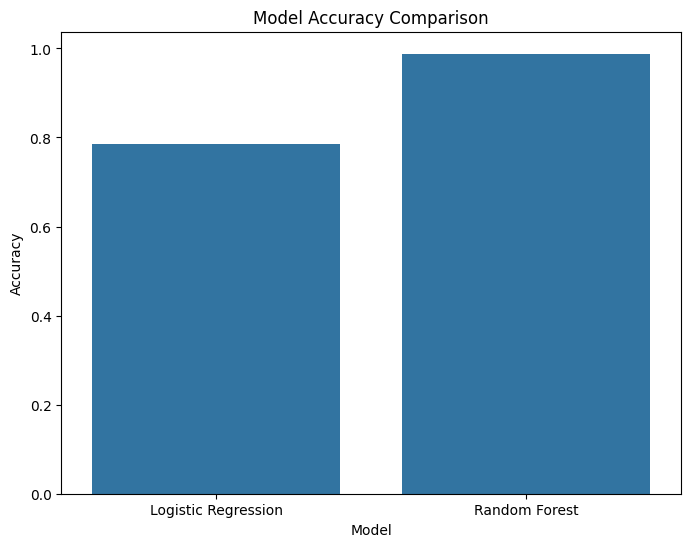

Accuracies:                  Model  Accuracy
0  Logistic Regression  0.784802
1        Random Forest  0.988085


In [33]:
# Train Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Compare accuracies
accuracies = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [lr_accuracy, rf_accuracy]
})

# Plot accuracies
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracies)
plt.title('Model Accuracy Comparison')
plt.savefig('model_accuracy.png')
plt.show()

print("Accuracies:", accuracies)

# Flowchart description:
# 1. Input: Cleaned dataset
# 2. Create target variable (high_tip)
# 3. Select features and split data
# 4. Scale features
# 5. Train Logistic Regression and Random Forest models
# 6. Evaluate accuracy
# 7. Output: Accuracy comparison plot

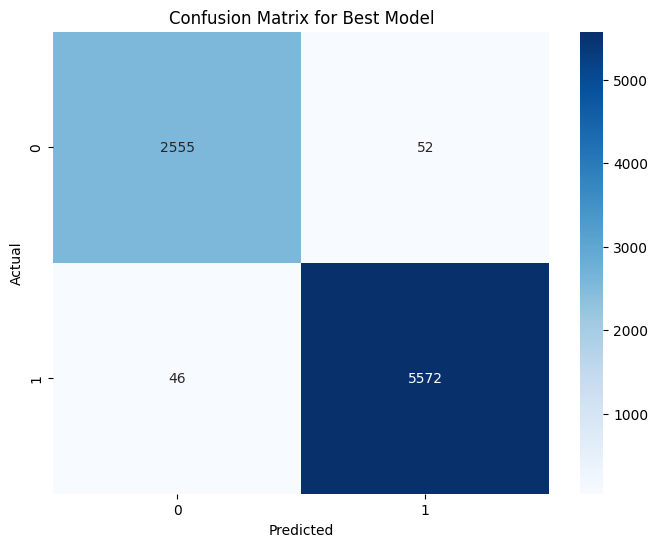

In [34]:
# Select best model (Random Forest if higher accuracy)
best_model = rf if rf_accuracy > lr_accuracy else lr
best_pred = rf_pred if rf_accuracy > lr_accuracy else lr_pred

# Plot confusion matrix
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()

# Rationale: The confusion matrix shows the performance of the best model in predicting high vs. low tips.